1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

Numpy documentation https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

Mersenne Twister - PRNG (pseudorandom number generator) https://en.wikipedia.org/wiki/Mersenne_Twister


## Purpose of numpy.random

Random number generation is vital for many practical programming needs such as security, model-building, simulation creation and statistical research. Of course, being deterministic machines, computers cannot create truly random numbers and so simulate randomness to create what are called pseudorandom numbers. These numbers are generally drawn from probability distributions and require an initial input seed to which an algorithm is applied in order to generate numbers in a predetermined fashion.

Pseudorandom - random but reproducible data https://realpython.com/python-random/

When discussing the various functions below, I will use random as a descriptive term for readability, even though everything generated from the package is pseudorandom.

https://stackoverflow.com/questions/4156907/why-is-random-not-so-random

https://www.eriksmistad.no/pseudo-random-numbers-and-sampling-from-probability-distributions/

In the section discussing the different probability distributions, I have used some classic examples to illustrate them (coin flipping and card shuffling). I have also shown the mean, median and mode   

### Why use numpy.random instead of built-in random.random?
While random.random by default produces single random numbers, it can produce multiple if used with the range function. However, numpy.random allows you to produce increasingly complex arrays of random numbers. https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

According to Python for Data Analysis (p. 118) numpy.random supplements the random module with a few extra probability distributions and functions
https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from scipy import stats

In [126]:
class bold:
    BOLD = '\033[1m'
    END = '\033[0m'

<br>

_________________________________________________________________________________________________________________

## Simple Random Data
At its most basic, the numpy.random package is used to generate random data or arrays of data, generally numerical. There are several functions in the package that create simple random data and each one does so in different ways. Before I move on to the more complex probability distributions and seed functions of the package, I will first discuss the following modules in this section:

- rand
- randn
- randint
- choice
- bytes

Within many of these functions I will discuss similar related functions that are also available elsewhere in the package.

<br>

### RAND 

The **rand** function generates a floating point number or array of floating point numbers from the half open interval \[0, 1), meaning that it includes every number greater than or equal to 0 and less than 1. If no arguments are passed to the function, a single random number is returned but **rand** is capable of generating large arrays of randomly generated numbers when integer arguments are passed. There is no limit to the number of arguments that can be passed so these arrays can be hugely complex. 

In [129]:
# Passing no arguments to generate a single random number.
print(bold.BOLD + "Generates a single random number:" + bold.END)
print(np.random.rand())
print()

# Passing (x, y) arguments will return x arrays with y values in each.
print(bold.BOLD + "Generates 2 arrays with 4 random numbers in each:" + bold.END)
print(np.random.rand(2, 4))
print()

# Passing x * y * z will return x arrays containing y arrays that have z values.
print(bold.BOLD + "Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:" +bold.END)
print(np.random.rand(2, 4, 6))


Generates a single random number:
0.6400784921962739

Generates 2 arrays with 4 random numbers in each:
[[0.99860037 0.60172771 0.05970803 0.97094243]
 [0.42044083 0.49637684 0.6539106  0.91782515]]

Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:
[[[0.02572223 0.72850349 0.9041442  0.8249846  0.02810759 0.50457301]
  [0.15686572 0.41788624 0.3958518  0.43444359 0.37654949 0.84306905]
  [0.50393663 0.26485606 0.12549809 0.43037777 0.98203476 0.04727982]
  [0.577304   0.91104533 0.49831277 0.07868277 0.51490219 0.91201016]]

 [[0.2585448  0.76194982 0.43528491 0.22342241 0.68627794 0.72821561]
  [0.96160511 0.8483716  0.95002202 0.56555981 0.32373401 0.40925672]
  [0.74173294 0.39944142 0.307241   0.46051405 0.66499473 0.96033125]
  [0.87400372 0.67768207 0.82416932 0.55322349 0.1609768  0.48529227]]]


<br>

#### Distribution

The numbers from **rand** are generated from a continuous uniform distribution, meaning that every number in the \[0, 1) range has an equal chance of being returned as any other. The plot below demonstrates this distribution across 10,000 randomly generated numbers from the **rand** function.

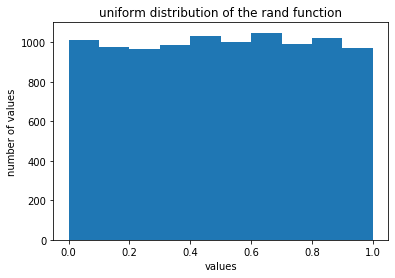

In [134]:
# Demonstrating the uniform distribution of the rand function.
x = np.random.rand(10000)
plt.hist(x)
plt.title("uniform distribution of the rand function")
plt.xlabel("values")
plt.ylabel("number of values")
plt.show()

<br>

#### Similar Functions in numpy.random

##### random_sample

There are several functions in the numpy.random package that are all variations of the same function and related to **rand**:

1. np.random.random
2. np.random.ranf
3. np.random.sample
4. np.random.random_sample

These functions can all be considered synonymous with each other, basically aliases for **random_sample**, kept in the package as they may be used by different communities.[<sup>1</sup>](https://stackoverflow.com/a/18829377) Below demonstrates how they all the perform the same function. 

In [4]:
# Demonstrating how the below functions are all the same
print(np.random.random_sample == np.random.random)

print(np.random.random_sample == np.random.ranf)

print(np.random.random_sample == np.random.sample)

True
True
True


**random_sample** is essentially the same as the **rand** function except for one very important distinction: while **rand** takes multiple arguments to build the shape of an array, **random_sample** only accepts one argument. To build a multi-dimensional array with **random_sample**, a tuple must be passed for it to function correctly.[<sup>2</sup>](https://stackoverflow.com/a/47232184) This can be useful when there are variables containing tuples from which one wants to create an array of random numbers.

In [132]:
# Demonstrating the difference between rand and random_sample.
print(bold.BOLD + "2 x 4 array from rand:" + bold.END)
print(np.random.rand(2, 4))
print()

# Passing a tuple
print(bold.BOLD + "2 x 4 array from random_sample:" + bold.END)
print(np.random.random_sample((2, 4)))
print()

# Passing a variable that contains a tuple
t = (2, 4)
print(bold.BOLD + "2 x 4 array from random_sample using a variable containing a tuple:" + bold.END)
print(np.random.random_sample(t))


2 x 4 array from rand:
[[0.83984581 0.33337863 0.97767763 0.76877959]
 [0.67779866 0.6047158  0.4508548  0.13250606]]

2 x 4 array from random_sample:
[[0.28658375 0.92455665 0.384828   0.44240423]
 [0.20978517 0.16921434 0.12434146 0.72073834]]

2 x 4 array from random_sample using a variable containing a tuple:
[[0.8387551  0.02369711 0.95045053 0.53385914]
 [0.08090904 0.48333097 0.19635723 0.3191641 ]]



##### uniform

The \[0, 1) range cannot be adjusted within the **rand** function, but there is a related function within numpy.random called **uniform**, which works in largely the same way as **rand** but allows a custom range to be passed. Again this is a half open interval, generating numbers greater than or equal to the low number and less than the high number. Below is an example of the function in operation and further illustration demonstrating the uniform probability distribution.

Generates 2 arrays with 4 random numbers in each within the custom range [-5, 10):
[[-2.92842168  8.55693322  6.89023039  7.23886431]
 [ 7.49692142  0.2046356   2.84880392 -3.07774458]]

Generates 4 random numbers in the custom range [-5, 10):
[ 2.01455463  5.28479432 -1.73681712 -4.46134643]



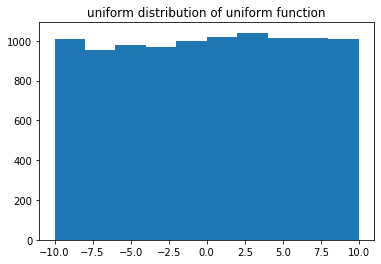

In [133]:
# Passing low and high arguments with size of (x, y) arguments will return x arrays with y values in each.
print(bold.BOLD + "Generates 2 arrays with 4 random numbers in each within the custom range [-5, 10):" + bold.END)
print(np.random.uniform(low=-5, high=10, size =(2, 4)))
print()

# Demonstrating it is not necessary to have 'low=' or 'high=' to operate the function. 
# 'size=' is necessary if more than one array is required.
print(bold.BOLD + "Generates 4 random numbers in the custom range [-5, 10):" + bold.END)
print(np.random.uniform(-5, 10, 4))
print()

# Demonstrating the uniform distribution of the uniform function.
x = np.random.uniform(-10, 10, 10000)
plt.hist(x)
plt.title("uniform distribution of uniform function")
plt.show()

<br>

### RANDN

**randn** functions in the same way as **rand** when generating numbers. Without any arguments, it will produce a single randomly generated number between \[0, 1) and with arguments will produce increasingly complex arrays of numbers. 

In [7]:
# Passing no arguments to generate a single random number:
print("\033[1m" + "Generates a single random number:" + "\033[0m")
print(np.random.randn())
print()

# Passing (x, y) arguments will return x arrays with y values in each
print("\033[1m" + "Generates 2 arrays with 4 random numbers in each:" + "\033[0m")
print(np.random.randn(2, 4))
print()

# Passing x * y * z will return x arrays containing y arrays that have z values
print("\033[1m" + "Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:" + "\033[0m")
print(np.random.randn(2, 4, 6))


Generates a single random number:
-1.4008384030214698

Generates 2 arrays with 4 random numbers in each:
[[ 0.19498763 -0.4774037  -0.28717005 -0.16655131]
 [ 0.29751343 -1.2632768  -1.54933155 -0.42062105]]

Generates 2 arrays with each containing 4 arrays and each of those containing 6 random numbers:
[[[ 2.37799634e-01  3.10030029e-01  3.38776942e-01  8.12637751e-01
    4.87397963e-02 -1.18401044e+00]
  [ 5.37302281e-04  1.10855999e+00 -1.71259756e-01  3.83056531e-01
   -2.05228610e+00 -8.57308690e-01]
  [ 1.78018097e+00 -8.07531406e-01 -1.31182011e+00  1.32330099e-01
   -2.64814885e-01 -3.95420852e-01]
  [-6.39505121e-01  4.44885673e-01 -2.15750742e-01 -2.85101412e-01
   -8.34940265e-01 -1.01056553e+00]]

 [[ 3.74662383e-02 -6.22713673e-01 -6.79904190e-01  7.50022945e-01
    1.15862754e+00 -2.83797176e-01]
  [ 2.22724510e-01 -5.95127017e-01  1.02638030e+00  9.88408460e-01
    9.88079731e-01 -1.45877736e+00]
  [ 9.20349278e-01  3.25639726e-01 -3.92124624e-01 -7.37001419e-01
    7.94

<br>

#### Distribution

What separates the **randn** function from **rand** is that numbers are generated from a normal Gaussian distribution rather than a uniform distribution. In this function the normal distribution has a mean of 0 and a variance of 1. This means that the majority of numbers generated centre around 0 and generally range between -1 and 1. The plot below helps to illustrate this; of the 10,000 numbers generated, the vast majority are within the -1 to 1 range and peak at the 0 mark. Looking again at the numbers generated above, it can be seen that they largely sit within the range (-1, 1).

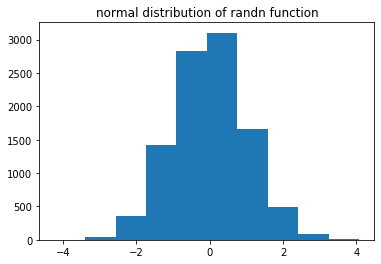

In [8]:
# Demonstrating the normal distribution of the randn function.
x = np.random.randn(10000)
plt.hist(x)
plt.title("normal distribution of randn function")
plt.show()

<br>

#### Similar Functions in numpy.random

##### standard_normal

Like **rand** and **random_sample**, **randn** has the same relationship with another numpy.random function called **standard_normal**, which only takes a single argument but can accept tuples.  

In [9]:
# Demonstrating the difference between randn and standard_normal.
print("\033[1m" + "2 x 4 array from randn:" + "\033[0m")
print(np.random.randn(2, 4))
print()

# Passing a tuple
print("\033[1m" + "2 x 4 array from standard_normal:" + "\033[0m")
print(np.random.standard_normal((2, 4)))
print()

# Passing a variable that contains a tuple
t = (2, 4)
print("\033[1m" + "2 x 4 array from standard_normal using a variable containing a tuple:" + "\033[0m")
print(np.random.standard_normal(t))


2 x 4 array from randn:
[[-0.92579742  0.94608626  0.96007257 -0.15294296]
 [-1.00777353  2.40675633  0.9819452  -1.28849302]]

2 x 4 array from standard_normal:
[[ 1.00201524  0.11526801 -0.04875722 -0.04255859]
 [ 0.29387368  1.0164656   0.48692243 -0.70837094]]

2 x 4 array from standard_normal using a variable containing a tuple:
[[-0.4945626   0.57136244  0.25650798  1.21538517]
 [ 0.22100824  1.19484977  0.24423924 -1.7849285 ]]



##### normal

Again similar to **rand**'s range, the mean (0) and standard deviation (1) cannot be altered within the **randn** function but there is another function in the numpy.random package that returns random numbers from a customised normal distribution range. The **normal** function takes a *loc* argument to determine the mean, a *scale* argument for the standard deviation, and a *size* argument for the output shape. In each of the functions below, the output should largely be in the range (2, 8) and centre around 5.      

Generates 2 arrays with 4 random numbers from the custom normal distribution:
[[5.75300009 2.35948706 7.19667405 9.45683333]
 [1.7748247  5.06296703 3.04527002 5.429835  ]]

Generates 4 random numbers from the custom normal distribution:
[10.94406159 -0.7153122   2.16273205  7.80588063]



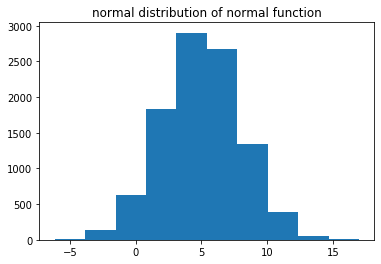

In [10]:
# Passing loc and scale arguments with size of (x, y) arguments will return x arrays with y values in each.
print("\033[1m" + "Generates 2 arrays with 4 random numbers from the custom normal distribution:" + "\033[0m")
print(np.random.normal(loc=5, scale=3, size =(2, 4)))
print()

# Demonstrating it is not necessary to have 'loc=' or 'scale=' to operate the function. 
# 'size=' is necessary if more than one array is required.
print("\033[1m" + "Generates 4 random numbers from the custom normal distribution:" + "\033[0m")
print(np.random.normal(5, 3, 4))
print()

# Demonstrating the normal distribution of the normal function.
x = np.random.normal(5, 3, 10000)
plt.hist(x)
plt.title("normal distribution of normal function")
plt.show()

<br>

### RANDINT

The functions explored so far all return random floating point numbers. If randomly generated integers are required, there is the **randint** function which returns random integers of a given range. The function  requires at least one argument to operate. If a single argument is provided, the function will return a number from the range 0 up to but not including the number passed, making it a half open interval. If a float rather than integer is passed, it will round down to the nearest integer. 

In [11]:
# Returns single random integer between 0-9 inclusive.
print(np.random.randint(10))

# Returns single random integer between 0-4 inclusive.
print(np.random.randint(5.925))

7
3


<br>

If two arguments are provided to **randint**, the first will be considered the lowest included number in the range and the second represents the number one above the highest possible number in the range. 

**randint** can also take an argument that dictates the shape of the output, either a single value for an array of that many numbers or a tuple for multi-dimensional arrays.

In [12]:
# Returns single random integer between 5-10 inclusive.
print("\033[1m" + "Generates 1 random number between 5-10 inclusive:" + "\033[0m")
print(np.random.randint(5, 11))
print()

print("\033[1m" + "Generates 3 random numbers between 5-10 inclusive:" + "\033[0m")
print(np.random.randint(5, 11, 3))
print()

print("\033[1m" + "Generates 2 arrays of 4 random numbers in each between 5-10 inclusive:" + "\033[0m")
print(np.random.randint(5, 11, size=(2, 4)))

Generates 1 random number between 5-10 inclusive:
5

Generates 3 random numbers between 5-10 inclusive:
[6 9 7]

Generates 2 arrays of 4 random numbers in each between 5-10 inclusive:
[[ 8  5  9  6]
 [10  5  6  7]]


<br>

There is a relatively new parameter in the **randint** function, which allows the output datatype to be specified. Different types of integer will be take up different amounts of storage space [<sup>3</sup>](https://stackoverflow.com/a/9696777) and so this parameter is useful if dealing with extremely large amounts of data. Each piece of code below generates the number 5 and the output demonstrates the number of bytes it takes to store each number 5, depending on the datatype argument. [<sup>4</sup>](https://stackoverflow.com/a/14329864) As would be expected, the *int64* type takes up more space than the *int8* type.

In [13]:
w = np.random.randint(5, 6, dtype='int8')
print(sys.getsizeof(w))

x = np.random.randint(5, 6, dtype='int16')
print(sys.getsizeof(x))

y = np.random.randint(5, 6, dtype='int32')
print(sys.getsizeof(y))

z = np.random.randint(5, 6, dtype='int64')
print(sys.getsizeof(z))

25
26
28
32


<br>

#### Distribution

**randint** generates random integers from a discrete uniform distribution, meaning that there is a finite amount of values that can be generated but each one has an equal change of being returned. Below, every integer on the range (0, 1000) inclusive has an equal chance of being called across 10,000 numbers.

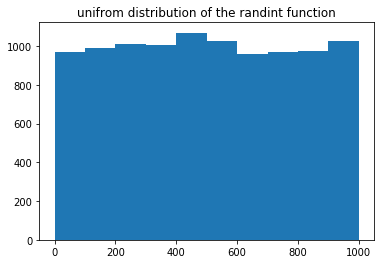

In [14]:
# Demonstrating the uniform distribution of the randint function.
x = np.random.randint(0, 1001, 10000)
plt.hist(x)
plt.title("unifrom distribution of the randint function")
plt.show()

<br>

#### Similar Function in numpy.random

There's another function listed in the numpy.random package called **random_integer** but this has been deprecated according to the documentation[<sup>3</sup>](https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.random_integers.html#numpy.random.random_integers) with the recommendation that **randint** be used instead.

<br>

#### Practical Example

Below is an example **randint** being used to simulate the answers provided by Magic 8 Ball. Each answer is assigned to an integer and when an integer is randomly generated from the **randint** function, the appropriate reply is returned.<sup>5</sup> 

In [15]:
# Magic 8 Ball simulation
# help from Automate the boring stuff p. 64

def Answer(number):
    if number == 1: 
        return "Yes."
    elif number == 2:
        return "Most likely."
    elif number == 3:
        return "All signs point to yes."
    elif number == 4:
        return "Ask again later."
    elif number == 5:
        return "Possibly."
    elif number == 6:
        return "Outlook not so good."
    elif number == 7:
        return "Doubtful"
    elif number == 8:
        return "No."
    
print("Will I be late for work in the morning?")
print(Answer(np.random.randint(1, 9)))

Will I be late for work in the morning?
Ask again later.


<br>

### CHOICE

**choice** is similar to **randint** in that it can generate random integers in a particular array shape. However, **choice** can accept ndarrays, tuples and lists as input, meaning that it has the potential to randomise non-numerical data, such as strings.

With only one argument passed, **choice** will return a single random integer from 0 up to but not including the number entered, just as **randint** does.

In [16]:
# Returns single random integer
print("\033[1m" + "Generates 1 random number between 0-9 inclusive:" + "\033[0m")
print(np.random.choice(10))
print()

# Returns random numbers from an array:
arr = np.arange(10)
print("\033[1m" + "Generates 3 random numbers from an array:" + "\033[0m")
print(np.random.choice(arr, size=3))
print()

# Returns random numbers from a tuple
tup = (4, 6, 7, 10, 15)
print("\033[1m" + "Generates 3 random numbers from a tuple:" + "\033[0m")
print(np.random.choice(tup, size=3))
print()

# Returns random non-numerical values from a list
lst = ["Mary", "John", "Helen", "Tony"]
print("\033[1m" + "Generates 3 random names from a list:" + "\033[0m")
print(np.random.choice(lst, size=3))

Generates 1 random number between 0-9 inclusive:
8

Generates 3 random numbers from an array:
[3 8 5]

Generates 3 random numbers from a tuple:
[ 4 15  6]

Generates 3 random names from a list:
['Tony' 'Mary' 'Helen']


<br>

The previously discussed functions can potentially repeat numbers from a range in the output array, and **choice** also does this by default. However, **choice** has a parameter called *replace*, a true/false boolean that is set to True by default but, if set to False by the user, will generate an output of unique values. In this case, once a value has been randomly generated, it is removed from the pool of available values and cannot be generated again. However, if the total number of values to choose from is smaller than the output shape specified (*size*) and *replace* is set to False, a *ValueError* will occur because there are not enough elements to fulfill the desired output without repeating any of them.

In [17]:
# Returns random values from a list with no duplicates:
print("\033[1m" + "Generates 3 random names from a list with no duplicates:" + "\033[0m")
print(np.random.choice(lst, size=3, replace=False))


Generates 3 random names from a list with no duplicates:
['John' 'Mary' 'Tony']


<br>

#### Distribution

By default, **choice** randomly picks values from a discrete uniform distribution but has an optional parameter, *p*, which allows the user to adjust the probability of each individual value appearing in the output. The number of values passed to *p* must be equal to the amount of elements available in the input and these *p* values must sum up to 1, to account for a total 100% probability. 

To illustrate this, the code below generates 1000 numbers from the range (0, 11]. As required, there is a *p* value for every element in this range. Most of the numbers have been given 0% probability of being returned but numbers 1, 5 and 10 have a 60%, 10%, and 30% chance of appearing in the output respectively. The plot shows that, of the 1000 numbers generated, 600 were ones, 100 were fives and 300 were tens.

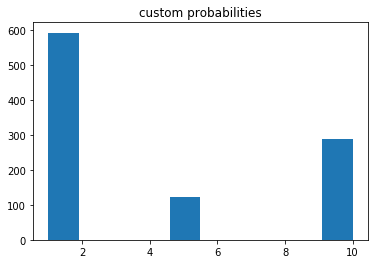

In [18]:
# Customising the probability of each input element and plotting the output.
x = np.random.choice((np.arange(11)), p = (0, 0.6, 0, 0, 0, 0.1, 0, 0, 0, 0, 0.3), size = 1000)
plt.hist(x)
plt.title("custom probabilities")
plt.show()

<br>

#### Practical Example

Below is an example of **choice** being used to simulate the drawing of hands from a deck of cards. A list containing the 52 cards of a deck is created[<sup>6</sup>](http://www.spronck.net/pythonbook/pythonbook.pdf) and **choice** allows the user to draw 4 hands of five cards each with no duplications. 

In [19]:
# Creating a deck of cards.
cards = []
values = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
suits = ["Hearts", "Diamonds", "Spades", "Clubs"]

for value in values:
    for suit in suits:
        cards.append(f"{value} of {suit}")

    
# Deals 4 hands with 5 cards in each and no duplicates.
hands = np.random.choice(cards, size=(4,5), replace=False)  
hands

array([['2 of Clubs', 'King of Spades', 'King of Clubs', 'Ace of Hearts',
        'Queen of Hearts'],
       ['7 of Spades', 'Queen of Spades', '7 of Clubs', '6 of Clubs',
        '10 of Hearts'],
       ['6 of Hearts', '4 of Clubs', '4 of Diamonds', '5 of Spades',
        '9 of Hearts'],
       ['9 of Diamonds', '8 of Hearts', '8 of Spades', '5 of Clubs',
        '2 of Hearts']], dtype='<U17')

<br>

### BYTES

The final function from the *Simple Random Data* section of the numpy.random package that I will discuss simply takes a single integer argument and generates a random sample of bytes of that length. **bytes** is an excellent function for efficiently generating a huge amounts of random data,[<sup>7</sup>](stefanocappellini.it/generate-pseudorandom-bytes-with-python/) which is useful for testing code. The below code generates 30 random bytes. 

In [20]:
# Random byte generation
np.random.bytes(30)

b"7\xe3\x07\x9a&'+\xaa\xb1\xbdq\xfd\xbeb\xe3K0\x8c\x82\xc4\xce\xe4\xe2Q\xa2\x18\xa8\xdb\x8bi"

<br>

_________________________________________________________________________________________________________

## Permutations

There are two separate but related functions in the numpy.random package that randomly rearrange the order of existing data or create a shuffled range of numbers.

### SHUFFLE

As the name suggests, **shuffle** shuffles the contents of a given list or array in place. This means that, unlike previous functions that can return the output when called, **shuffle** alters a variable and its effect can't be observed until the variable itself is called. The function takes one argument only, the list or array to be shuffled. It does not accept tuples as they are immutable and thus cannot be modified by shuffling the contents.

In [21]:
# Demonstrating how shuffle operates in place.
print("\033[1m" + "Output from attempting to print shuffle command:" + "\033[0m")
print(np.random.shuffle([1, 2, 3]))
print()

# Shuffling a 1D array of numbers.
x = np.array([1, 2, 3, 4, 5, 6])
print("\033[1m" + "Original array:" + "\033[0m")
print(x)
print()
np.random.shuffle(x)
print("\033[1m" + "Shuffled array:" + "\033[0m")
print(x)
print()

# Shuffling a list using the deck of cards created earlier.
print("\033[1m" + "Original deck order:" + "\033[0m")
print(cards[:15])
print()
np.random.shuffle(cards)
print("\033[1m" + "Shuffled deck order:" + "\033[0m")
print(cards[:15])

Output from attempting to print shuffle command:
None

Original array:
[1 2 3 4 5 6]

Shuffled array:
[3 2 5 6 4 1]

Original deck order:
['2 of Hearts', '2 of Diamonds', '2 of Spades', '2 of Clubs', '3 of Hearts', '3 of Diamonds', '3 of Spades', '3 of Clubs', '4 of Hearts', '4 of Diamonds', '4 of Spades', '4 of Clubs', '5 of Hearts', '5 of Diamonds', '5 of Spades']

Shuffled deck order:
['Queen of Hearts', '5 of Spades', '4 of Clubs', '2 of Hearts', 'Queen of Spades', '8 of Spades', '4 of Spades', 'Queen of Clubs', '9 of Diamonds', 'Ace of Hearts', 'Ace of Clubs', 'King of Clubs', '6 of Diamonds', '3 of Hearts', '3 of Diamonds']


<br>

If a multidimensional array is passed, only the outermost arrays will be shuffled. The order of inner arrays and individual elements are not affected by **shuffle**. The 3D array below consists of 3 arrays, each containing 2 arrays of 3 elements each. When this array is passed through the **shuffle** function, only the first 3 arrays are rearranged.   

In [22]:
# shuffling a 3D numpy array
x = np.array([[[1, 2, 3],[4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
np.random.shuffle(x)
x

array([[[13, 14, 15],
        [16, 17, 18]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[ 1,  2,  3],
        [ 4,  5,  6]]])

To shuffle the innermost elements of a multi-dimensional array, you can first change it to a 1D array, perform shuffle and then return the array to its original shape.[<sup>8</sup>](https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/) 

In [23]:
# Create 3D array
x = np.array([[[1, 2, 3],[4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print("\033[1m" + "3D array:" + "\033[0m")
print(x)
print()

# Transform into 1D array 
x = x.ravel()
print("\033[1m" + "3D array changed to 1D array:" + "\033[0m")
print(x)
print()

# Shuffle the array
np.random.shuffle(x)
print("\033[1m" + "Shuffled 1D array:" + "\033[0m")
print(x)
print()

# Transform back to 3D array
x = x.reshape(2, 2, 3)
print("\033[1m" + "Shuffled 1D array changed back to 3D array:" + "\033[0m")
print(x)

3D array:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]

3D array changed to 1D array:
[ 1  2  3  4  5  6  7  8  9 10 11 12]

Shuffled 1D array:
[10  5  9  7  4  3 11  1  6  8 12  2]

Shuffled 1D array changed back to 3D array:
[[[10  5  9]
  [ 7  4  3]]

 [[11  1  6]
  [ 8 12  2]]]


<br>

### PERMUTATION

Like the **shuffle** function, **permutation** will rearrange the contents of an array, list or tuple but, rather than affecting the input in place, returns a copy of the variable with the contents shuffled. [<sup>9</sup>](https://stackoverflow.com/a/15474335)  The original order is not affected as illustrated in the code below.

In [24]:
# Demonstrating that permutation does not affect original variable
x = (1, 2, 3, 4, 5, 6)
print("\033[1m" + "Variable x:" + "\033[0m")
print(x)
print()
print("\033[1m" + "Permuted instance of x:" + "\033[0m")
print(np.random.permutation(x))
print()
print("\033[1m" + "Unaffected original x:" + "\033[0m")
print(x)

Variable x:
(1, 2, 3, 4, 5, 6)

Permuted instance of x:
[1 5 3 4 6 2]

Unaffected original x:
(1, 2, 3, 4, 5, 6)


<br>

Another feature that differentiates **permutation** from **shuffle** is that **permutation** can accept a single integer argument and will return a shuffled version of a range from 0 up to but not including the integer passed. This output can also be shaped into an array as shown below. 

In [25]:
# Returning shuffled 2D array of numbers from 0-9 inclusive
np.random.permutation(10).reshape(2, 5)

array([[6, 9, 0, 4, 7],
       [1, 3, 5, 8, 2]])

<br>

Multidimensional arrays are treated in a similar way to **shuffle** in that arrays are only shuffled along the first axis in the returned output.

In [26]:
x = np.array([[[1, 2, 3],[4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
np.random.permutation(x)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

<br>

_________________________________________________________________________________________

## Probability Distributions

In previous sections, the numbers generated have been drawn from either uniform or normal distributions by default but numpy.random offers 35 different probability distribution functions from which random numbers can be drawn. 


https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/

Discrete data can only take a specific, finite number of values and is usually represented as whole numbers e.g. flipping a coin or rolling dice

Continuous data can take an infinite number of values from a given range, e.g. height, weight or distance.

https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

https://www.johndcook.com/blog/2009/01/23/probability-distributions-and-object-oriented-programming/


- Binomial
- Multinomial
- Poisson
- Exponential
- Geometric

Each function takes a parameter, *size* which allows them to create multi-dimensional arrays of random numbers. When illustrating the functions below, I only generate single arrays of numbers but it is possible to generate very complex multidimensional arrays from each of these different probability distributions.

### BINOMIAL

The **binomial** function is a based on the Bernoulli distribution, a discrete binary distribution that operates with just two mutually exclusive outcomes such as yes/no, on/off, heads/tails.[<sup>10</sup>](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03) The function takes three arguments:

- **n:** the number of independent trials, e.g. the number of times a coin is flipped.
- **p:** probability of an outcome of each trial, e.g. the probability of flipping a coin and getting heads would be 50/50.
- **size:** the output shape which is the number of times a series of trials is carried out, e.g. carrying out a 10 coin flips 100 times.

Taking a fair coin toss as an illustrative example, the code below demonstrates the binomial distribution of the number of times heads is achieved every 10 flips across 1000 experiments. [<sup>11</sup>](https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/) The histogram reflects the 50% probability of heads winning on a coin flip. The plot peaks at approximately 5 heads winning every 10 flips, while 0-2 heads and 8-10 heads are a lot less likely to happen.The shape of the plot looks very similar to a normal distribution, but that is only because of the large sample size. The key difference between normal and binomial distributions is that normal is continuous and binomial is discrete. [<sup>12</sup>](http://staweb.sta.cathedral.org/departments/math/mhansen/public_html/23stat/handouts/normbino.htm) There are no values in between the values of a binomial distribution, i.e. a coin lands on heads either 2 or 3 times, there is nothing in between.


From this distribution, numpy.random generates 1000 random numbers, which should range from 0/1 - 9/10 and have a median and mode of 5 to reflect the 50% probability that the coin lands on heads.

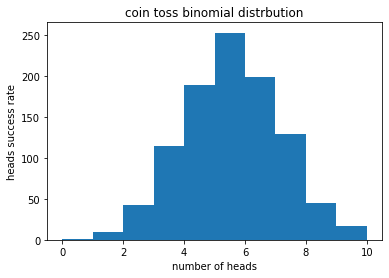

Sample of random numbers:
[6 2 5 5 7 7 8 3 7 7 6 5 6 5 1 5 9 3 5 6]

The 1000 random numbers generated from this binomial distributions range from 0 to 10 with a mean of 5.072, a median of 5.0 and a mode of [5].


In [60]:
# Flipping a coin 10 times.
flips = 10

# Setting probability that heads will come up.
heads_prob = 0.5

# Number of experiments where the coin is tossed 10 times.
exp = 1000

# Creating the array of random numbers.
x = np.random.binomial(flips, heads_prob, size = exp)

# Plotting the distribution
plt.hist(x)
plt.title("coin toss binomial distrbution")
plt.xlabel("number of heads")
plt.ylabel("heads success rate")
plt.show()

# Sample of genrated numbers
print("\033[1m" + "Sample of random numbers:" + "\033[0m")
print(x[:20])
print()

# Calculating the value that occurs most often. 
mode = stats.mode(x)

# The 1000 numbers generated from the binomial distribution.
print("\033[1m" + f"The {exp} random numbers generated from this binomial distributions range from "
      f"{x.min()} to {x.max()} with a mean of {x.mean()}, a median of {np.median(x)} and a mode of {mode[0]}."  + "\033[0m")

<br>

### MULTINOMIAL

Where the binomial distribution operates on two possible outcomes, a multinomial distribution - as the name suggests - can work with several. The **multinomial** function takes three arguments, some of which are similar to the **binomial** function:

- **n:** the number of independent trials, e.g. the number of times card is picked.
- **pvals:** probability of each value outcome, e.g. the 1/4 probability of each suit in a deck of cards.
- **size:** the output shape which is the number of times a series of trials is carried out, e.g. 5 cards drawn 100 times.

To illustrate this discrete distribution, I'll use the example of a deck of cards. [<sup>13</sup>](https://stattrek.com/probability-distributions/multinomial.aspx)  A card is drawn from a 52 card deck, the suit is noted and the card is shuffled back into the deck. This means that every time a card is drawn, there is consistently a 25% chance that it could be any suit. Ten cards are drawn in this way to constitute a single trial. A numpy array is returned that shows how many times each suit is drawn as shown below:

In [61]:
# Drawing 10 cards
draws = 10

#  Single multinomial trial.
x = np.random.multinomial(draws, pvals = (0.25, 0.25, 0.25, 0.25))
print(x)
print()
print("\033[1m" + f"The {draws} cards drawn in this trial contain {x[0]} hearts, {x[1]} diamonds, {x[2]} clubs and {x[3]} spades." + "\033[0m")

[4 1 3 2]

The 10 cards drawn in this trial contain 4 hearts, 1 diamonds, 3 clubs and 2 spades.


The code below repeats each trial 10,000 times to visually demonstrate the distribution. In the histogram, each suit is represented by a different colour and they are uniformly distributed in the frequency they are drawn, which is to be expected as the probability for each is equal. With 10 cards drawn, and the probability of each suit set to 25%, an average of 2.5 cards of each suit should be drawn. But since we can't halve cards, we can see that in most arrays returned each suit appears 2-3 times. The numbers within in each array are between 0 (no cards of a particular suit drawn) to 10 (all cards drawn are of the same suit.

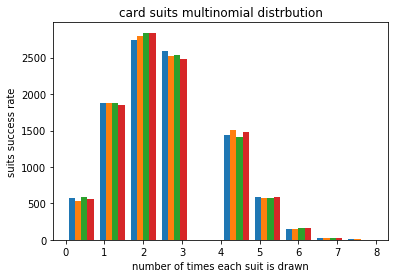

Sample of random number arrays:
[[3 3 3 1]
 [2 2 2 4]
 [3 5 1 1]
 [3 3 2 2]
 [1 2 5 2]
 [3 2 3 2]
 [2 3 1 4]
 [3 4 2 1]
 [1 4 2 3]
 [3 1 3 3]]

The 10000 random arrays generated from this multinomial distribution have numbers ranging from 0 to 8 with a mean of 2.5.


In [89]:
# Output size.
size = 10000

# Creating the random number arrays.
x = np.random.multinomial(draws, pvals = (0.25, 0.25, 0.25, 0.25), size=size)

# Plotting the distribution.
plt.hist(x)
plt.title("card suits multinomial distrbution")
plt.xlabel("number of times each suit is drawn")
plt.ylabel("suits success rate")
plt.show()

# Sample of genrated numbers
print("\033[1m" + "Sample of random number arrays:" + "\033[0m")
print(x[:10])
print()

# Calculating the value that occurs most often. 
mode = stats.mode(x)

# The 10,000 random number arrays returned.
print("\033[1m" + f"The {size} random arrays generated from this multinomial distribution have numbers ranging from {x.min()} to {x.max()} with a mean of {x.mean()}."  + "\033[0m")

<br>

### POISSON

The poisson distribution is a special case of the binomial distribution where we do not know the exact values of n (number of trials) or p (probability) but do know the average number of successes in a certain period of time. This value, the success rate, is called lambda (λ) and is the same as multiplying the probability of success by the number of trials (np). [<sup>13</sup>](https://medium.com/@andrew.chamberlain/deriving-the-poisson-distribution-from-the-binomial-distribution-840cc1668239) It is a discrete distribution, usually used to model the average rate that independent events occur.

The **poisson** function takes two arguments: 

- **λ (lam):** the average number of events in a certain unit of time, e.g. calls per hour.
- **size:** the output shape, which is the number of time periods, e.g. number of hours per week.

As an example, the code below looks at the number of phone calls an employee takes per hour at their job over the course of a year, working 40 hours a week for 48 weeks of the year. Of course, it would be impossible to know for certain how many people are going to phone in an hour, never mind the probability of such, but the number of calls received in an hour can be quantified and the mean deduced. If the average number of phone calls received every hour is 10, then with the poisson distribution it can range from 0 to over 25 calls per hour, but generally the number will be close to 10 as demonstrated by the mean, median and mode values below. 

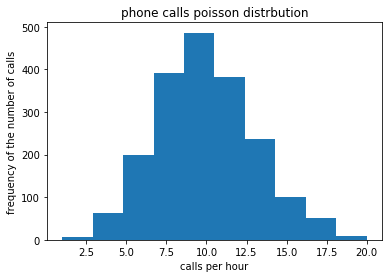

Sample of random numbers:
[ 5 10 19 11  9 18  8  9 10  6 13 10 15  9  4 13  7 18  9 11]

The 1920 random numbers generated from this poisson distribution range from 1 to 20 with a mean of 9.92, a median of 10.0 and a mode of [9].


In [112]:
# Calls per hour.
cph = 10

# Number of hours worked in a year.
year = 40 * 48

# Creating the array of random numbers
x = np.random.poisson(cph, size = year)

# Plotting the distribution.
plt.hist(x)
plt.title("phone calls poisson distrbution")
plt.xlabel("calls per hour")
plt.ylabel("frequency of the number of calls")
plt.show()

# Sample of genrated numbers
print("\033[1m" + "Sample of random numbers:" + "\033[0m")
print(x[:20])
print()

# Calculating the value that occurs most often. 
mode = stats.mode(x)

# The 1920 numbers generated from the poisson distribution.
print("\033[1m" + f"The {year} random numbers generated from this poisson distribution range from {x.min()} to {x.max()} with a mean of {x.mean().round(3)}, a median of {np.median(x)} and a mode of {mode[0]}."  + "\033[0m")

<br>

### EXPONENTIAL

Where the poisson distribution looks at the number of events in a certain timeframe, an exponential distribution could be used to look at the time intervals between events.[<sup>16</sup>](https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution). It is a continuous distribution as time intervals are not made up of fixed values. In numpy.random, the **exponential** function takes two arguments:

- **β (scale):** the time interval between events, e.g. 6 minutes between one phone call and another.
- **size**: the output shape, which is the number of times a particular time period lapsed between events, e.g. the number of times 6 minutes lapsed between phone calls.  

Looking back at the worker who has an average of 10 phone calls per hour, the parameter β would be 1/10 (1/λ) to represent 0.1% of the time interval, which in this case is measured in hours. This means the worker gets approximately 1 call every 6 minutes (0.1% of 60 mins = 6mins). As the histogram below illustrates, most of the phone calls that come in are centred around the 0.1 mark and as the time interval gets larger, the chances that a such a long time would pass before a call drop off dramatically, e.g. it is very rare that half an hour (0.5 on the histogram) would pass between phone calls. The random numbers generated from the exponential distribution in this case

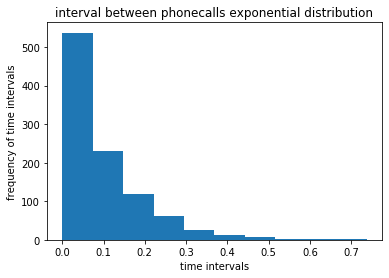

Sample of random numbers:
[0.00040417 0.13408684 0.00299155 0.0647835  0.22106635]

The 1000 random numbers generated from this exponential distribution range from about 0.000116183674345583 to 0.737419050626247 with a mean of 0.09948296953182446.


In [121]:
# Average time interval (1/λ).
interval = 1/cph

# Creating the array of random numbers.
x = np.random.exponential(interval, size = 1000)

# Plotting the distribution.
plt.hist(x)
plt.title("interval between phonecalls exponential distribution")
plt.xlabel("time intervals")
plt.ylabel("frequency of time intervals")
plt.show()

# Sample of genrated numbers
print("\033[1m" + "Sample of random numbers:" + "\033[0m")
print(x[:5])
print()

# The 1920 numbers generated from the exponential distribution.
print("\033[1m" + f"The 1000 random numbers generated from this exponential distribution range from about {x.min()} to {x.max()} with a mean of {x.mean()}.")        
      

### GEOMETRIC

The final function I will discuss is the **geometric** function, which is related to the exponential distribution except that is it discrete rather than continuous. The histogram in the code below looks very similar to the exponential plot above but represents a very different set of data. Where an exponential distribution represents the time between events, a geometric probability distribution represents the number of failures before a successful event in a series of Bernoulli trials. [<sup>17</sup>](https://www.statisticshowto.datasciencecentral.com/geometric-distribution/). The **geometric** function takes two parameters:

- **p:** the probability of success of a trial, e.g. the 50/50 chance of heads or tails when flipping a coin.
- **size:** the output shape, which is the number of trials before a success, e.g. the number of times the coin was flipped before getting a heads.

Going back to the Bernoulli trial of a coin flip that was used in the discussion about the **binomial** function, I will use the same scenario to demonstrate the geometric distribution. While previously we counted the number of times heads was achieved in 10 coin flips, here we look at the number of flips it takes before the coin lands on heads. Once a heads is achieved, the number of flips is recorded and the next trial begins. The **p** value is again set to 0.5 to represent the 50% probability of getting heads. As may be expected, most of the time when flipping a coin it might only takes 1 or 2 flips before you'd see a heads and the histogram below reflects that with almost half of the 1000 trials taking 2 flips or less.

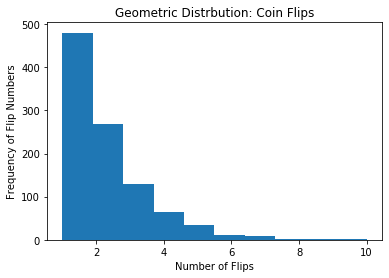

Sample of random numbers:
[1 1 1 1 1 1 1 2 2 1 1 2 1 2 4 1 2 1 5 2]

The 1000 random numbers generated from this poisson distribution range from 1 to 10 with a mean of 2.004, a median of 2.0 and a mode of [1].


In [94]:
# Creating the array of random numbers.
x = np.random.geometric(0.5, size = 1000)


# Plotting the distribution.
plt.hist(x)
plt.title("Geometric Distrbution: Coin Flips")
plt.xlabel("Number of Flips")
plt.ylabel("Frequency of Flip Numbers")
plt.show()

# Sample of genrated numbers
print("\033[1m" + "Sample of random numbers:" + "\033[0m")
print(x[:20])
print()

# Calculating the value that occurs most often. 
mode = stats.mode(x)

# The 1000 numbers generated from the geometrical distribution.
print("\033[1m" + f"The 1000 random numbers generated from this poisson distribution range from {x.min()} to {x.max()} with a mean of {x.mean().round(3)}, a median of {np.median(x)} and a mode of {mode[0]}."  + "\033[0m")

<br>

_________________________________________________________________________________________________________________

## Random Seeds

Difference between using random.seed with and without initialising RandomState https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate/22994529
https://stackoverflow.com/a/5837352

Looks like with RandomState you can create an instance of a new seed without affecting anything else while random.seed  has a global effect

https://www.sharpsightlabs.com/blog/numpy-random-seed/

http://justinbois.github.io/bootcamp/2016/lessons/l26_random_number_generation.html

https://www.statisticshowto.datasciencecentral.com/random-seed-definition/


In [33]:
# To initialise a seed instance
x = np.random.RandomState(10)
# To change the seed globally
np.random.seed(5)

print(x.rand(3))

print (np.random.rand(3))

print(x.rand(3))

print (np.random.rand(3))

[0.77132064 0.02075195 0.63364823]
[0.22199317 0.87073231 0.20671916]
[0.74880388 0.49850701 0.22479665]
[0.91861091 0.48841119 0.61174386]


leftover bits

Types of Bernoulli distributions https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03

https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b

"It (exponential) is the continuous random variable equivalent to the geometric probability distribution for discrete random variables." https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

<br>

__________________________________________________________________________________________________________


## References

1. Rand versus random_sample: https://stackoverflow.com/a/18829377
2. Difference between np.random.rand and np.random.random: https://stackoverflow.com/a/47232184
3. Different integer types: https://stackoverflow.com/a/9696777
3. Deprecation of random_integers https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.random_integers.html#numpy.random.random_integers
4. Checking the size of different datatypes: https://stackoverflow.com/a/14329864
5. Magic 8 Ball code adapted from: Sweigart, A. (2015). *Automate the Boring Stuff with Python*. San Fracisco: No Starch Press (p. 64).
6. Deck of cards adapted from: Spronck, P. (2017). *The Coder's Apprentice: LEarning Programming with Python 3*. http://www.spronck.net/pythonbook/pythonbook.pdf (p. 341).
7. Efficiency of the bytes function: Cappellini, S. (2018). *How to (efficiently) generate a huge number of pseudorandom bytes using Python*. stefanocappellini.it/generate-pseudorandom-bytes-with-python/
8. Shuffling elements of multidimensional arrays adapted from: https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/
9. Difference between np.random.shuffle and np.random.permutation: https://stackoverflow.com/a/15474335
10. Binomial and Bernoulli Distributions: https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119197096.app03
11. Coin toss binomial function adapted from: https://cmdlinetips.com/2018/12/simulating-coin-toss-experiment-with-binomial-random-numbers-using-numpy/
12. Difference between binomial and normal distributions: http://staweb.sta.cathedral.org/departments/math/mhansen/public_html/23stat/handouts/normbino.htm
13. Multinomial distribution example idea: https://stattrek.com/probability-distributions/multinomial.aspx
13. About the poisson distribution: https://medium.com/@andrew.chamberlain/deriving-the-poisson-distribution-from-the-binomial-distribution-840cc1668239
14. Relationship between poisson and exponential: https://stats.stackexchange.com/questions/2092/relationship-between-poisson-and-exponential-distribution
17. Relationship between geometric and exponential: https://www.statisticshowto.datasciencecentral.com/geometric-distribution/